# Explore here

Image Classifying Algorithm

In [33]:
# Import Packages
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

In [34]:
import matplotlib.pyplot as plt


In [35]:
dog_subfolder = "/Users/yourname/path/to/dog"


In [36]:
print(os.path.exists(dog_subfolder))


False


In [37]:
dog_subfolder = "/full/path/to/your/dogsvscats/folder"


In [38]:
print(os.path.exists(dog_subfolder))


False


In [39]:
import os
print(os.getcwd())


/Users/mariannacastro/Desktop/4Geeks/proyectos/image-classifier-Mari/src


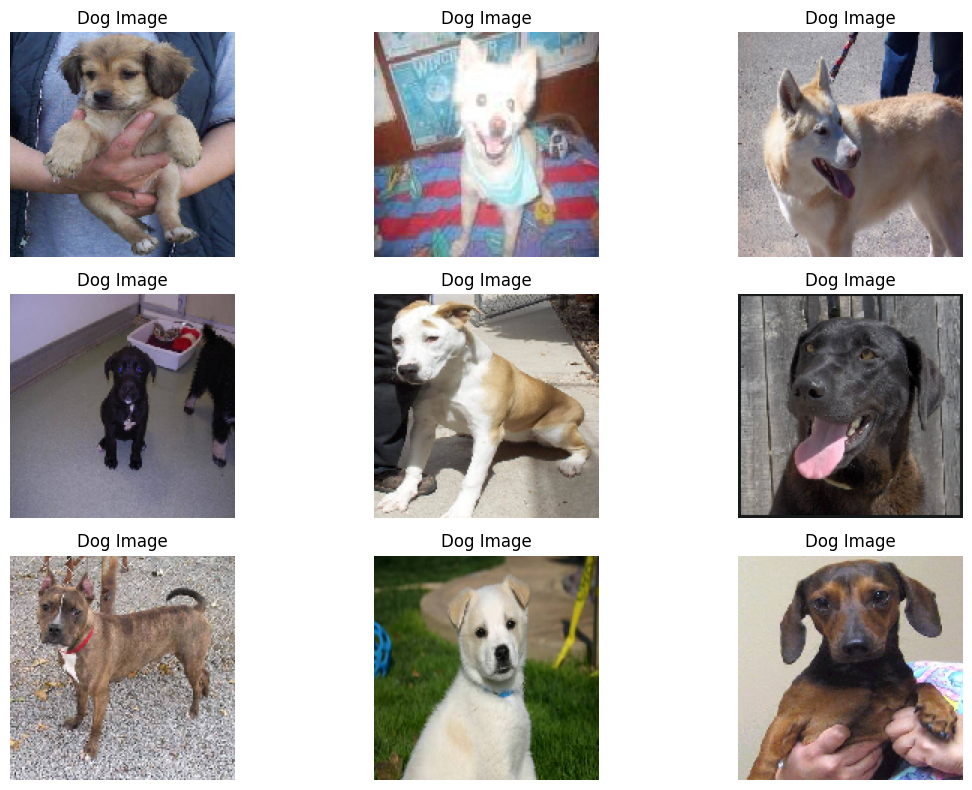

In [40]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# ✅ Correct path to the folder containing dog images
dog_subfolder = "../data/raw/dogsvscats 2/dogs_vs_cats/train/dogs"

# Check if path exists
if not os.path.exists(dog_subfolder):
    raise FileNotFoundError(f"Directory not found: {dog_subfolder}")

# ✅ Get a list of all dog image file names
dog_image_files = os.listdir(dog_subfolder)

# ✅ Load the first nine dog images
dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path, target_size=(150, 150))  # resize to keep images consistent
    img_array = image.img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
    dog_images.append(img_array)

# ✅ Create a single figure to display all nine images
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

plt.tight_layout()
plt.show()


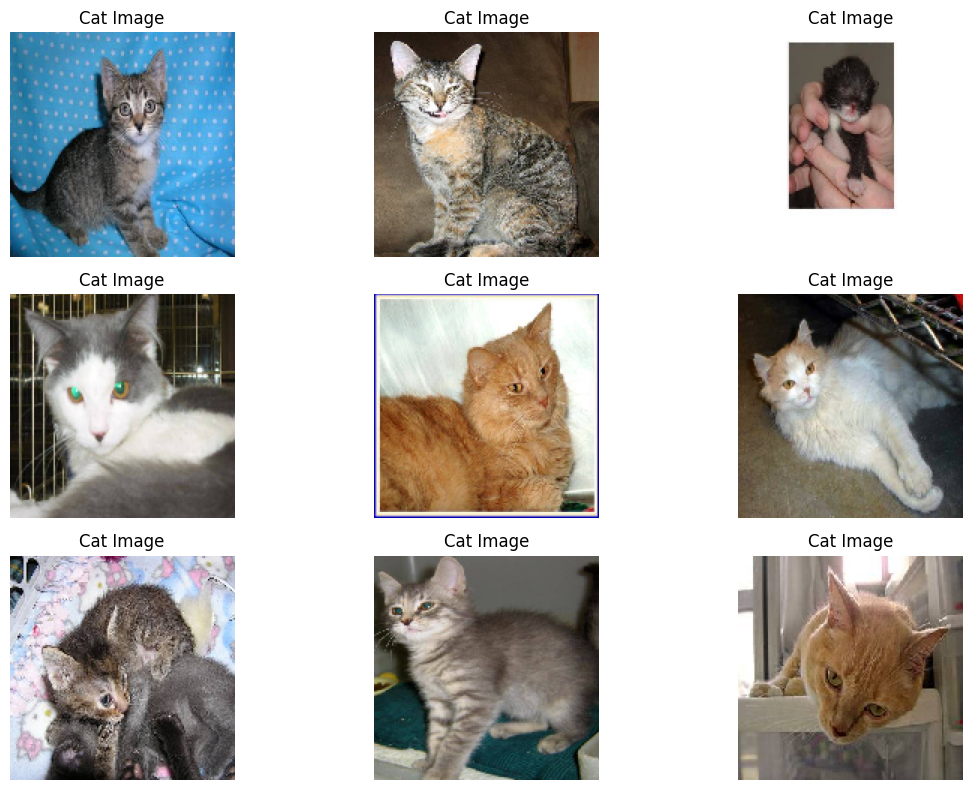

In [41]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# ✅ Correct path to the folder containing cat images
cats_subfolder = "../data/raw/dogsvscats 2/dogs_vs_cats/train/cats"

# Check if path exists
if not os.path.exists(cats_subfolder):
    raise FileNotFoundError(f"Directory not found: {cats_subfolder}")

# ✅ Get a list of all cat image file names
cats_image_files = os.listdir(cats_subfolder)

# ✅ Load the first nine cat images
cats_images = []
for i in range(min(9, len(cats_image_files))):
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    img = image.load_img(img_path, target_size=(150, 150))  # Resized for consistency
    img_array = image.img_to_array(img) / 255.0
    cats_images.append(img_array)

# ✅ Display the images
plt.figure(figsize=(12, 8))
for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

plt.tight_layout()
plt.show()


Create the Images Data Sets

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set paths
train_dir = "../data/raw/dogsvscats 2/dogs_vs_cats/train"
test_dir = "../data/raw/dogsvscats 2/dogs_vs_cats/test"
image_size = (200, 200)

# Create generators
datagentrain = ImageDataGenerator(rescale=1./255)
datagentest = ImageDataGenerator(rescale=1./255)

# Train data
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=["dogs", "cats"],
    class_mode='binary'
)

# ✅ Test data — fixed typo
test_data = datagentest.flow_from_directory(
    test_dir,
    target_size=image_size,
    classes=["dogs", "cats"],
    class_mode='binary'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


Train The Model

In [46]:
# Move the Data Through the Neural Network
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Move the Data through the Dense Layers
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

/Users/mariannacastro/Desktop/4Geeks/proyectos/image-classifier-Mari/tf-env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
# Compile the Model using Adam 
from keras.optimizers import Adam

# Compile the Model before Training
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [49]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(200, 200, 3)),  # ✅ Input matches your image size
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification: dog vs. cat
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [50]:
model.fit(train_data, epochs=1)


625/625 ━━━━━━━━━━━━━━━━━━━━ 902s 1s/step - accuracy: 0.5785 - loss: 0.6877


Save our Model to Use it Later

In [51]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.h5", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_data, steps_per_epoch = 100, validation_data = test_data, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])

Epoch 1/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 694ms/step - accuracy: 0.7447 - loss: 0.5253
Epoch 1: val_accuracy improved from -inf to 0.71250, saving model to ../models/vgg16_1.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 72s 717ms/step - accuracy: 0.7446 - loss: 0.5253 - val_accuracy: 0.7125 - val_loss: 0.5759
Epoch 2/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 695ms/step - accuracy: 0.7601 - loss: 0.5001
Epoch 2: val_accuracy improved from 0.71250 to 0.76875, saving model to ../models/vgg16_1.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 72s 716ms/step - accuracy: 0.7600 - loss: 0.5001 - val_accuracy: 0.7688 - val_loss: 0.5062
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 696ms/step - accuracy: 0.7932 - loss: 0.4637
Epoch 3: val_accuracy did not improve from 0.76875
100/100 ━━━━━━━━━━━━━━━━━━━━ 72s 716ms/step - accuracy: 0.7931 - loss: 0.4638 - val_accuracy: 0.7656 - val_loss: 0.5301


Due to GitHub Space constraints, the model will not be inside the models folder

Same with the original pictures, they aren't in the repo

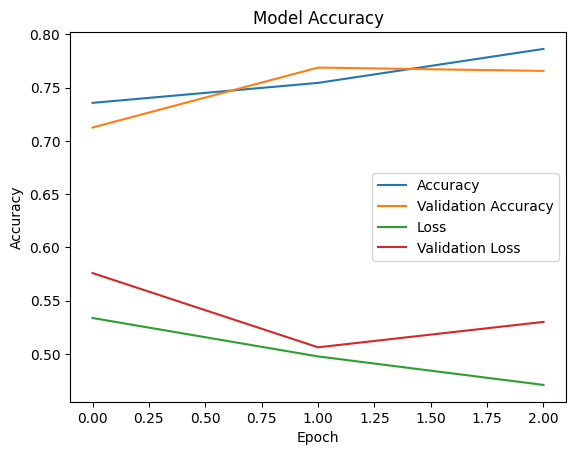

In [52]:
# Check the Accuracy of the Data

# Plot the Results
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configure the Plot Layout
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Plot
plt.show()

Try and Predict the Images

In [55]:
import os

test_dog_dir = "../data/raw/dogsvscats 2/dogs_vs_cats/test/dogs"
print(os.listdir(test_dog_dir))


['dog.1753.jpg', 'dog.775.jpg', 'dog.11102.jpg', 'dog.3622.jpg', 'dog.5253.jpg', 'dog.6982.jpg', 'dog.7444.jpg', 'dog.1021.jpg', 'dog.6996.jpg', 'dog.5247.jpg', 'dog.3150.jpg', 'dog.10220.jpg', 'dog.6766.jpg', 'dog.5290.jpg', 'dog.5284.jpg', 'dog.1974.jpg', 'dog.11843.jpg', 'dog.3805.jpg', 'dog.12386.jpg', 'dog.8944.jpg', 'dog.10591.jpg', 'dog.4818.jpg', 'dog.1237.jpg', 'dog.4429.jpg', 'dog.11300.jpg', 'dog.577.jpg', 'dog.205.jpg', 'dog.3434.jpg', 'dog.9657.jpg', 'dog.9131.jpg', 'dog.6202.jpg', 'dog.4415.jpg', 'dog.10022.jpg', 'dog.11328.jpg', 'dog.9125.jpg', 'dog.10750.jpg', 'dog.3408.jpg', 'dog.1592.jpg', 'dog.5938.jpg', 'dog.7849.jpg', 'dog.10977.jpg', 'dog.5086.jpg', 'dog.7861.jpg', 'dog.10787.jpg', 'dog.5904.jpg', 'dog.10793.jpg', 'dog.8401.jpg', 'dog.11512.jpg', 'dog.365.jpg', 'dog.3554.jpg', 'dog.5643.jpg', 'dog.11274.jpg', 'dog.8373.jpg', 'dog.2138.jpg', 'dog.11506.jpg', 'dog.8415.jpg', 'dog.4207.jpg', 'dog.359.jpg', 'dog.3568.jpg', 'dog.5119.jpg', 'dog.6410.jpg', 'dog.12027.jp

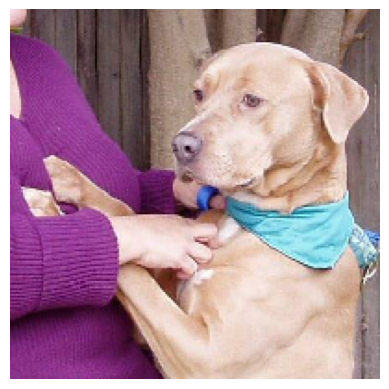

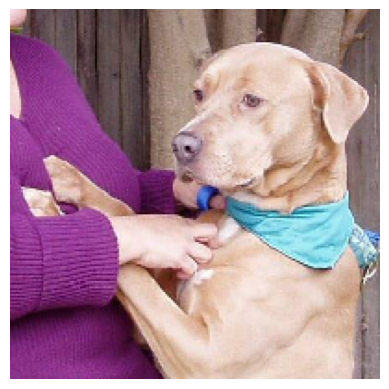

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: cat


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import os

# Use a valid test image
img_path = "../data/raw/dogsvscats 2/dogs_vs_cats/test/dogs/dog.1753.jpg"

# Check if the file exists
if not os.path.exists(img_path):
    raise FileNotFoundError(f"Image not found: {img_path}")

# Load and preprocess image
img = image.load_img(img_path, target_size=(200, 200))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# ✅ Display image (no .astype needed)
plt.imshow(img)
plt.axis('off')
plt.show()


# Display image
plt.imshow(img)  # ✅ works with PIL.Image
plt.axis('off')
plt.show()

# Load model and predict
saved_model = load_model("../models/vgg16_1.h5")

# Predict
output = saved_model.predict(img_array)

# Interpret output
if output.shape[-1] == 1:
    # Binary classification: sigmoid output
    prediction = "dog" if output[0][0] > 0.5 else "cat"
else:
    # Multi-class (e.g., softmax with 2 units)
    prediction = "dog" if output[0][1] > output[0][0] else "cat"

print(f"Prediction: {prediction}")
